### Нейронные сети

Мы уже познакомились с концепцией линейной модели, знаем как они выглядят и работают.

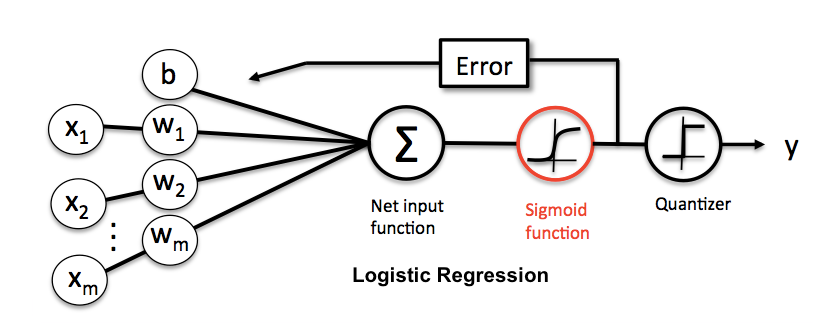

In [16]:
from IPython.display import Image
Image(filename='img/l4_2.png')

В основе (входной слой), у нас всегда есть данные (Х), которые умножаются на веса (W). Можно в математической нотации это представить в виде.

<center><h3>$Z =\sum_i w_i*x_i + b$</h3></center>

Можно перейти от суммы к векторной записи, мы уже знаем как работают размерности матриц и векторов при умножении. Тогда сумма редуцируется в векторную форму

<center><h3>$Z =W*X + b$</h3></center>

Где у W размерность будет (1хN), а у Х (Nx1). Две формулы выше идентичны.

Но надо понимать что каждый входный параметр x это размерность нашего исходного пространства. Если у нас на входе картинка 784 пикселя, значит у нас 784-х мерное пространство. Формула будет иметь вид $Z = x_1 * w_1 + x_2 * w_2 + .... + x_{784} * w_{784}$

Попытаться визуализировать пространство подобных размерностей это нетривилаьная задача. Любая размерность больше 3-х уже вызывает затруднения. Тогда давайте попробуем с самомго простого случая. Одномерное входное пространство. $Z = x_1*w_1$.

Придумаем какие нибудь данные для классификации и визуализируем наше решение. По оси абсцисс отложим значения $x_1$, по оси ординат значения $Z$. И проведём линию разделяющую один класс от другого (это и будет графическое представление нашей формулы $Z = x_1*w_1$ )

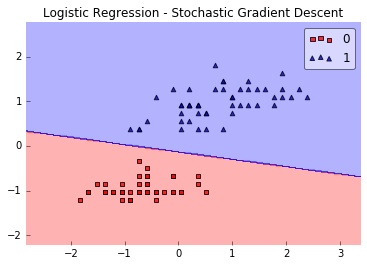

In [17]:
Image(filename='img/l5_1.png')

Сделаем шаг дальше, теперь у нас двумерное входное пространство $Z = x_1*w_1 + x_2*w_2$. Входное пространство двумерное, а ответ тоже надо отобразить, значит изображение получится трёхмерным. Тоже придумаем данные для классификации. И проведём плоскость, которая будет представлением нашей формулы $Z = x_1*w_1 + x_2*w_2$.

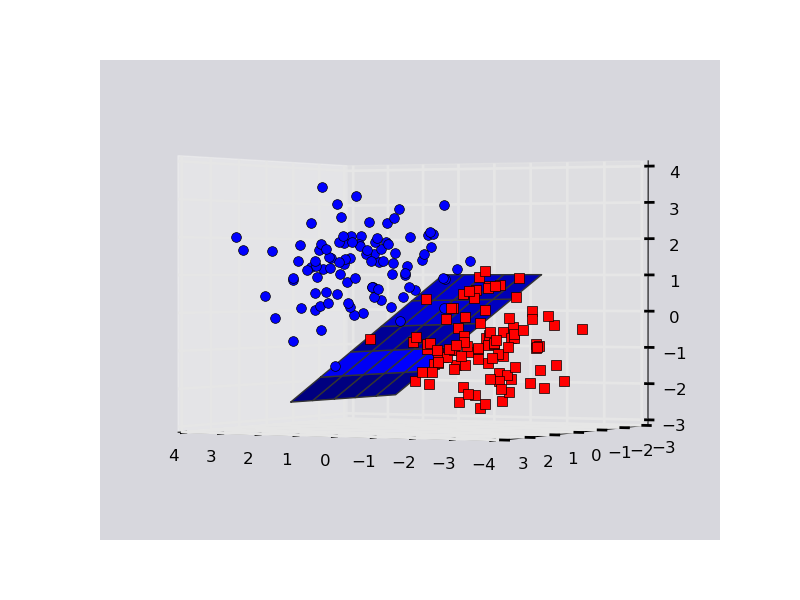

In [18]:
Image(filename='img/l5_2.png')

Дальше пространства мы нарашивать уже не можем, наш визуальный аппарат не позволит их представить.

Но стоит обратить внимание на то, что в случае одномерных входных данные у нас классы разделяются линией, в случае двумерного входа, классы разделяются плоскостью. В случае большего количества пространств ничего кординально не изменится, по нашей формуле $Z =\sum_i w_i*x_i + b$, мы будем получать разделяющую <b>гиперплоскость</b>.

Это очень важный момент. Наше семейство алгоритмов называются "линейными" не случайно. Формула $Z =\sum_i w_i*x_i + b$ не способна на иное, только линейные модели.

Однако далеко не все входные данные имеют линейную структуру, соответсвенно не везде линейные модели будут работать хорошо. Представим наши входные данные имеют такой вид:

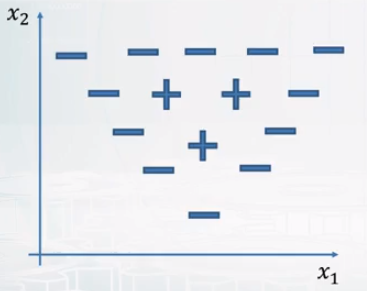

In [19]:
Image(filename='img/l5_3.png')

Нельзя построить линейную разделяющую плоскость, которая работала бы на наших данных.

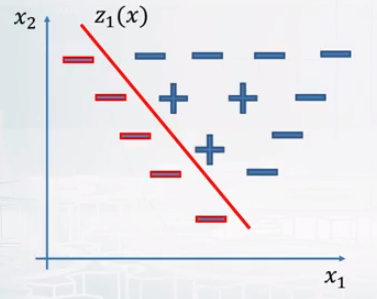

In [21]:
Image(filename='img/l5_4.png')

Но мы можем попробовать построить несколько разделяющих поверхностей. Каждая из которых не будет стремиться целиком решить проблему, но может дать нам какую то информацию для принятия решения.

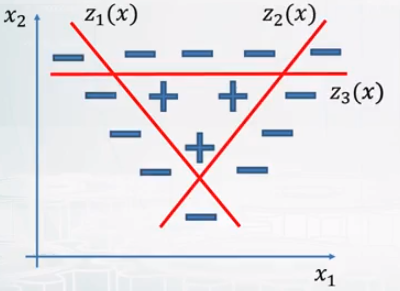

In [22]:
Image(filename='img/l5_5.png')

Теперь мы перешли от двумерного входного пространства в трёхмерное.

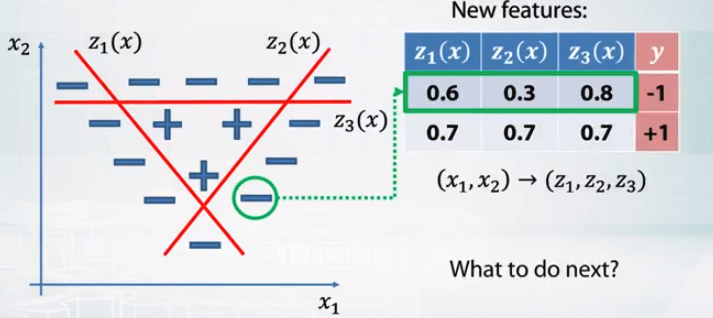

In [24]:
Image(filename='img/l5_6.png')

При это мы помним, что каждая линия z это уже классификатор, $z_1 = x_1*w_1 + x_2*w_2 + b$. Мы помним чо в классификаторах мы использовали сигмойду, как функцию которая нам давала вероятность, что точка принадлежит одному из двух классов. Обоначим это <center><h3>$z_1 = \sigma(x_1*w_1 + x_2*w_2 + b)$.</center></h3>

Теперь у нас есть три параметра z, что делать дальше? Давайте построим такую же простую линейную классификацию только использовав их как входные параметры.
<center><h3>$a = \sigma(z_1*w_3 + z_2*w_4 + z_3*w_5 + b)$.</center></h3>



Теперь наш computational graph выглядит следующим образом

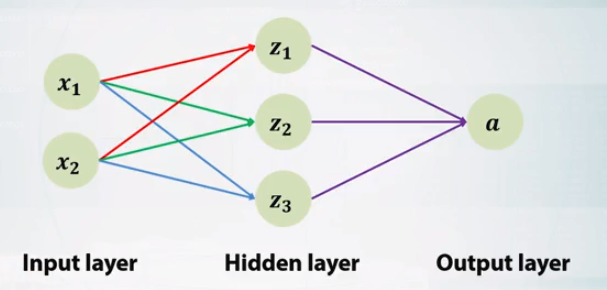

In [25]:
Image(filename='img/l5_7.png')

Это называется multi-layer perceptron (MLP)

Схема выше упрощена, чтобы пониать общую архитектуру. Но мы помним как выглядит каждый z при более детальном рассмотрении.

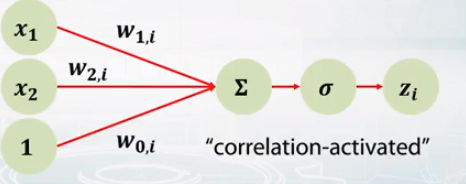

In [26]:
Image(filename='img/l5_8.png')

Раньше использование сигмойды было объясненно нашими нуждами, мы делали бинарную классификацию. Когда нам потребовалась мульти классификация (10 чисел), мы избавились от сигмойды и использовали softmax для получения предсказания. Наша функция активации имела легко объяснимый эффект и предназначение. Теперь у нас сигмойда появилась даже в промежуточных вычислениях, где нет никаких предсказаний, может лучше будет избавиться от ней?

<center>$z_1 = x_1*w_{1,1} + x_2*w_{2,1} + b$.</center>
<center>$z_2 = x_1*w_{1,2} + x_2*w_{2,2} + b$.</center>
<center>$z_3 = x_1*w_{1,3} + x_2*w_{2,3} + b$.</center>

<center>$a = \sigma(z_1*w_1 + z_2*w_2 + z_3*w_3 + b)$</center>

*Неверное представление для Z!*

У нас получилась упрощённая схема, без лишних сигмойд. Но были ли они лишними? Давайте попробуем подставить в выражение для $a$ вместо z их формулы и мы увидим как коэффициенты w группируются.


<center>$a = \sigma(x_1*(w_1*w_{1,1}) + x_2*(w_1*w_{2,1}) + .........)$</center>


Убрав сигмойду, как функцию активации из скрытого слоя (при подсчёте z), в конечном итоге у нас получилась линейная функция и в $a$. 

Если у нас отсутствует нелинейная функция активации в скрытых слоях, не важно сколько слоём мы сделаем, на выходе у нас всегда будет обычная линейная модель. 

Теперь мы видим как выглядит простая нейронная сеть. Кстати, название взяли по аналогии с человеческим мозгом, где вычислительные операции выполняют нейроны. 

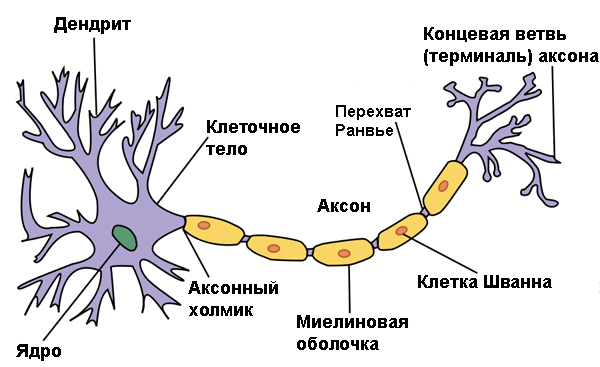

In [28]:
Image(filename='img/l5_9.gif')

При помощи дендритов нейрон соединяется с аксонами других нейронов. По ним он получает электрический импульс и при насыщении сам испускает сигнал по собственному аксону, который так же связан с другими нейронами.

При аналогии с человескими нейронами надо помнить, что вычислительная аналогия очень упрощена. Нейрологи до сих пор не полностью понимают весь механизм и процессы работы человеческих нейронов. 

Хорошо, вернёмся к нашим искуственным нейронам.

Раньше мы могли изменять нашу функцию активации (мы поменяли сигмойду на softmax, когда делали мультиклассификацию), можем ли мы сделать сейчас тоже самое? Да, можем.

Сигмойда самая известная функция, но уже устаревшая, на практике её не так то просто встретить в настоящих моделях.

Вспомним как она выглядит

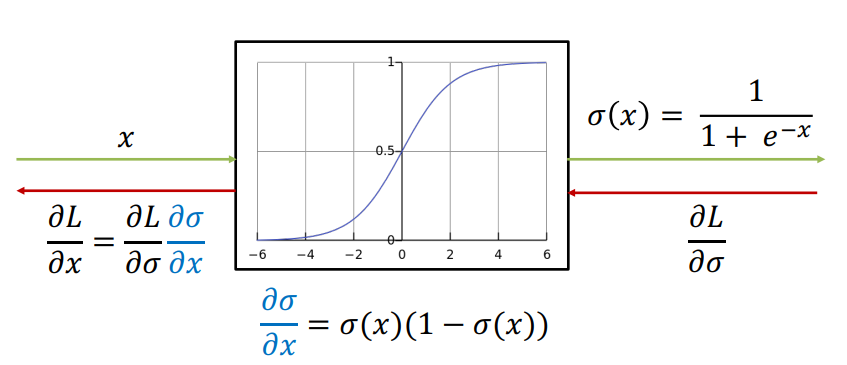

In [32]:
Image(filename='img/l5_10.png')

Вспомним, что всё обучение работает благодаря алгоритму обратного распространения ошибки (backpropagation). Мы берём производную в точке и смотрим как нам надо поменять параметры для уменьшения ошибки. Однако по графику сигмойды, мы видим, что производная на участках $[-\inf, -5]$ и $[5, \inf]$ практически равна 0, а значит и при backpropagation мы будем менять наши веса на очень-очень маленькое число, что сильно замедлит обучение. Это называется проблемой исчезающего градиента. 


В настоящее время самое популярной функцией активации является ReLU (Rectified Linear Units) 

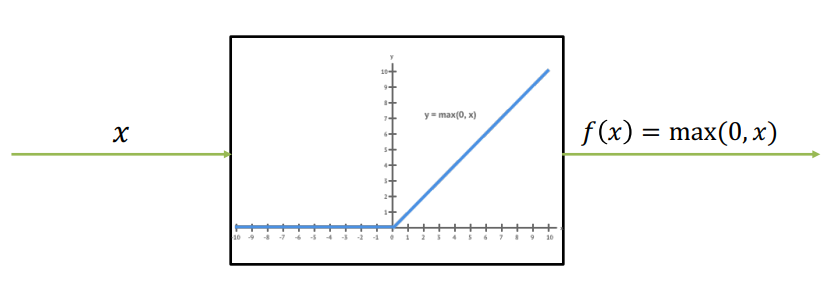

In [35]:
Image(filename='img/l5_11.png')

Она легко вычисляется, и не имеет проблемы исчезающего градиента. Однако имеется проблема умирающего нейрона. Когда на вход функции активации приходит отрицательное значение, градиент в нейроне будет равен 0. 

ReLU не была взята случайно, имеются значительное теоритические обоснования, что единичная функция ReLU, можем быть воспроизведена при помощи складывания большого количества сигмойд. Но вычислительно она гораздо проще и сейчас является самой популярно функцией активации.

Ещё один аспект про который стоит сказать это начальная инициализация весов. В случае линейной модели, мы инициализировали все W нулями, и алгоритм работал как и должен. Если мы продолжим брать начальные значения W нулями, то во всех наших скрытых нейронах будут получаться одинаковые значения, а значит и градиент в них тоже будет одинаков. Мы же хотим, чтобы каждый нейрон выполнял различные вычисления. По этому самый простой способ (но не самый оптимальный), это инициализировать все веса W, небольшим случайным значением. 

Теперь остаётся только вопрос архитектуры сетей. Сколько скрытых слоёв делать, сколько нейронов в каждом слое. Какие функции активации выбирать. Какой learning rate ставить. Всё это называется гиперпараметрами сети и составлять мы можем что угодно. Хоть и есть некоторые эвристические практики для разных задач, особая их эффективность не доказана. Только пробы и ошибки. 

Вернёмся на секунду к нашему примеру, где линейный классификатор плохо работал, потомук что данные невозможно было линейно разделить.

Мы должны помнить, что у нас всегда есть возможность совершать с входными данными какие угодно изменения, умножать-делить-логарифмировать. И после некоторых входных изменений, входные данные могут оказаться линейно разделимыми.

Это называется Feature Transformation.

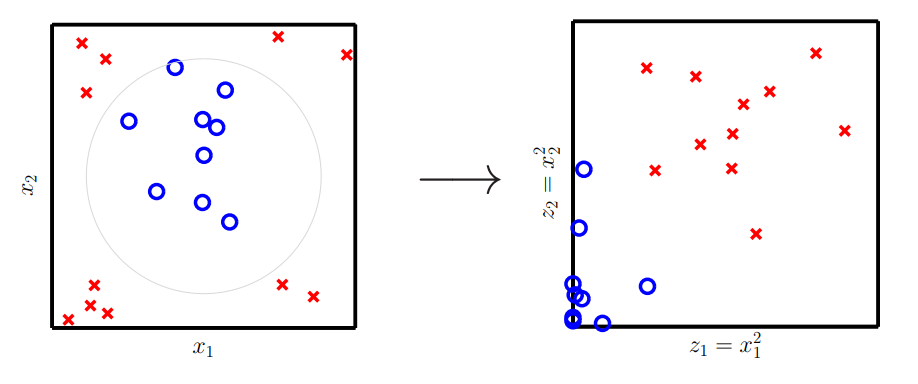

In [36]:
Image(filename='img/l5_12.png')

Теперь попробуем ощутить это сами.

Время для игр!

https://playground.tensorflow.org/

В каждом нейроне у нас имеется свой уникальный набор весов W. И если визуализировать эти веса, мы сможем увидеть, на какой шаблон, каждый конкретный нейрон реагирует больше всего.

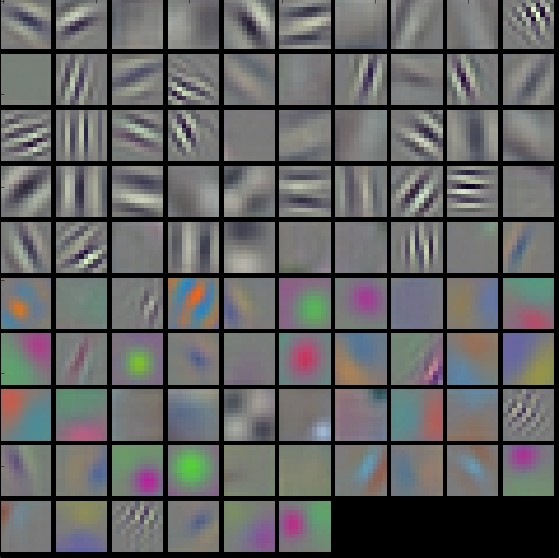

In [38]:
Image(filename='img/l5_13.jpeg')

Это представление весов из нейронов первого скрытого слоя. Мы видим что нейроны реагируют на простые элементы: вертикальный, горизонтальный, диагональные узоры, цветовая палитра, местоположение узора.

Так будет выглядеть визуализация для нашего датасета MNIST с изображением рукописных цифр

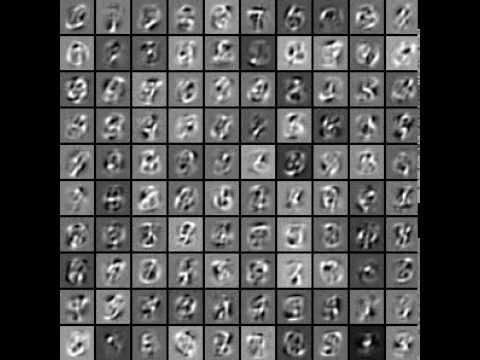

In [40]:
Image(filename='img/l5_14.jpg')

Теперь попробуем обучить не линейную классификацию, а нейронную сеть на нашем датасете. Теперь мы не будем пользоваться низкоуровневыми библиотеками вроде numpy или scikit, а возьмём высокоуровнивую библиотеку для нейронных сетей - keras.

Для того, чтобы у вас заработал код ниже надо из anaconda prompt установить keras 

conda install -c conda-forge keras


In [49]:
import tensorflow as tf
import keras
from keras.models import Sequential
import keras.layers as ll

from keras.callbacks import TensorBoard
from time import time
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))



Для доступа к tensorboard в отдельном окне anaconda prompt запустите 

tensorboard --logdir=logs/

Запустится тензор-борд, в окне запуска он выведет адрес по которому его можно будет увидеть. Адрес вбиваете в окне браузера - вуаля.

Вначале загрузим датасет с изображениями рукописных цифр. Для этого в tensorflow есть специальная команда

In [66]:
mnist = tf.keras.datasets.mnist

In [ ]:
# Разбиваем данные на обучающий и тест сеты
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [51]:
# Нормализуем данные, теперь наши входные данные из диапазона [0,255] перейдут в диапазон [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0
# Меняет ответ из вида "4" в векторный вид [0,0,0,0,1,0,0,0,0]
y_train,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_test])

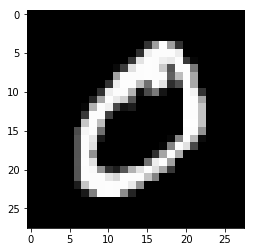

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[1], cmap="gray");

In [62]:
# Объявляем какого вида наша нейронная сеть
model = Sequential(name="mlp")
# На входе у нас изображения 28х28 пикселей
model.add(ll.InputLayer([28, 28]))
# Распремляем матрицу, теперь у нас 724х1 вектор
model.add(ll.Flatten())
# Объявляем первый скрытый слой, там у нас будет 50 нейронов
model.add(ll.Dense(50))
# После скрытого слоя нам нужна нелинейность - функция активации
model.add(ll.Activation('relu')) # OR keras.layers.LeakyReLU()
# Второй скрытый слой
model.add(ll.Dense(50))
model.add(ll.Activation('relu'))
# Выходной слой, у нас 10 возможный классов, значит и 10 нейронов на выходе
model.add(ll.Dense(10, activation='softmax'))
# Оптимизируем модель при помощи SGD (стохастического градиентного спуска),
# Функция ошибки кросс-энтропия
# Метрика успешности модели - accuracy (количество угаданных / общее количество)
model.compile("SGD", "categorical_crossentropy", metrics=["accuracy"])

In [63]:
# Выводим описание нашей модели
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_21 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_22 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Обучаем
model.fit(x_train, y_train,
          validation_data=(x_test, y_test), epochs=5, callbacks=[tensorboard]);

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.7095 - acc: 0.8021 - val_loss: 0.3328 - val_acc: 0.9045
Epoch 2/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.3124 - acc: 0.9107 - val_loss: 0.2732 - val_acc: 0.9220
Epoch 3/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.2609 - acc: 0.9251 - val_loss: 0.2311 - val_acc: 0.9348
Epoch 4/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2278 - acc: 0.9346 - val_loss: 0.2103 - val_acc: 0.9380
Epoch 5/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.2032 - acc: 0.9417 - val_loss: 0.1909 - val_acc: 0.9443


In [65]:
# Финальная оценка модели
print("\nLoss, Accuracy = ", model.evaluate(x_test, y_test))

10000/10000 [==============================] - 0s 24us/step

Loss, Accuracy =  [0.19088833256959914, 0.9443]
